# SQL import

In [8]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Obtener la contraseña de forma segura
load_dotenv()
sql_password = os.getenv("sql_password")

# Configuración de la base de datos y la conexión
bd = "popatoms"
connection_string = 'mysql+pymysql://root:' + sql_password + '@localhost/' + bd
engine = create_engine(connection_string)

In [10]:
# Leer la consulta SQL en un DataFrame
consulta = "SELECT * FROM track" #AQUI PEGAR LA QUERY SIN ;  EN UN SOLO BLOQUE 
df = pd.read_sql(consulta, con=engine)

In [11]:
df

,track_id,sp_id,title,album,title_spotify,artist_id,colab,release_date,release_year,peak_rank,...,speechiness,loudness,valence,acousticness,instrumentalness,liveness,tempo,duration,track_key,track_mode
0,1,2ltpYs0O8uNesHFgGHg0bt,('til) I Kissed You,The Fabulous Style Of The Everly Brothers,('Til) I Kissed You,1,0,1960-01-01,1960,4.0,...,0.0438,-10.431,0.664,0.61400,0.00,0.3420,141.087,145.960,1.0,1.0
1,2,0rI1QQ8kMc7MH7LgnOPteX,(A Ship Will Come) Ein Schiff Wird Kommen,The Waltzing Cat,The Waltzing Cat,2,1,2004-02-14,2004,88.0,...,0.0415,-21.700,0.246,0.98300,0.68,0.0553,133.759,166.547,7.0,1.0
2,3,0zKZqHPNUKjjhsUJHT06RZ,(All of a Sudden) My Heart Sings,My Heart Sings (Remastered),(All Of A Sudden) My Heart Sings - Remastered,3,0,1959-01-01,1959,15.0,...,0.0298,-10.179,0.342,0.78000,0.00,0.5130,111.446,182.560,4.0,1.0
3,4,2CkbNJooPxUsHG4gFXKhxa,(Baby) Hully Gully,Doin' the Hully Gully,Baby Hully Gully,4,0,1960-07-06,1960,72.0,...,0.0382,-6.090,0.869,0.51600,0.00,0.1980,115.772,218.642,2.0,1.0
4,5,58EirkLFB6O6wwRN9JowHB,(Dance The) Mess Around,Dancin' Party: The Chubby Checker Collection (...,Dance The Mess Around,5,0,2020-06-19,2020,24.0,...,0.0479,-5.509,0.826,0.38100,0.00,0.1950,146.559,132.933,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,976,None,Chemical,Chemical,Chemical,589,0,2023-04-14,2023,NaN,...,0.0435,-4.856,0.392,0.00154,0.00,0.1030,169.949,184.013,2.0,1.0
909,977,None,Vampire,GUTS,vampire,603,0,2023-09-08,2023,NaN,...,0.0538,-5.821,0.323,0.15400,0.00,0.2630,136.848,219.724,5.0,1.0
910,978,None,Good 4 U,SOUR,good 4 u,603,0,2021-05-21,2021,NaN,...,0.1540,-5.044,0.688,0.33500,0.00,0.0849,166.928,178.147,9.0,1.0
911,979,None,Dance the Night,Dance The Night (From Barbie The Album),Dance The Night - From Barbie The Album,586,0,2023-05-25,2023,NaN,...,0.0480,-4.930,0.775,0.02070,0.00,0.3290,110.056,176.579,11.0,0.0


In [12]:
consulta_tempo_lustrum="SELECT lustrum, ROUND(AVG(tempo)) AS avg_tempo FROM track GROUP BY lustrum ORDER BY lustrum"
tempo_lustrum_df= pd.read_sql(consulta_tempo_lustrum, con=engine)

tempo_lustrum_df

,lustrum,avg_tempo
0,1955-1959,119.0
1,1960-1964,119.0
2,1965-1969,118.0
3,1970-1974,120.0
4,1975-1979,122.0
5,1980-1984,117.0
6,1985-1989,114.0
7,1990-1994,118.0
8,1995-1999,119.0
9,2000-2004,115.0


In [13]:
consulta_duration_lustrum="SELECT lustrum, ROUND(AVG(duration), 2) AS avg_duration FROM track GROUP BY lustrum ORDER BY lustrum"
duration_lustrum_df= pd.read_sql(consulta_duration_lustrum, con=engine)

duration_lustrum_df

,lustrum,avg_duration
0,1955-1959,153.85
1,1960-1964,158.70
2,1965-1969,208.87
3,1970-1974,219.84
4,1975-1979,271.04
5,1980-1984,266.48
6,1985-1989,271.28
7,1990-1994,256.49
8,1995-1999,236.06
9,2000-2004,236.30


In [25]:
consulta_weeks = """
WITH random_titles AS (
    SELECT 
        t.title
    FROM 
        track t
    WHERE 
        t.weeks IS NOT NULL
)
SELECT 
    t.title, 
    MAX(c.name) AS chart_name,  
    MAX(t.weeks) AS weeks,
    MAX(t.acousticness) AS acousticness,
    MAX(t.track_id) AS track_id,
    MAX(t.energy) AS energy,
    MAX(t.danceability) AS danceability,
    MAX(t.valence) AS valence,
    MAX(t.track_mode) AS track_mode,
    MAX(t.track_key) AS track_key,
    MAX(t.peak_rank) AS peak_rank
   
FROM 
    track t
JOIN 
    chart_entry ce ON t.track_id = ce.track_id
JOIN 
    chart_update cu ON ce.update_id = cu.update_id
JOIN 
    chart c ON cu.chart_id = c.chart_id
JOIN 
    random_titles rt ON t.title = rt.title
GROUP BY 
    t.title
ORDER BY 
    t.title
"""

weeks_properties_df = pd.read_sql(consulta_weeks, con=engine)
weeks_properties_df

,title,chart_name,weeks,acousticness,track_id,energy,danceability,valence,track_mode,track_key,peak_rank
0,('til) I Kissed You,'hot 100',16,0.6140,1,0.4650,0.569,0.664,1.0,1.0,4
1,(A Ship Will Come) Ein Schiff Wird Kommen,'hot 100',4,0.9830,2,0.0663,0.357,0.246,1.0,7.0,88
2,(All of a Sudden) My Heart Sings,'hot 100',17,0.7800,3,0.3600,0.435,0.342,1.0,4.0,15
3,(Baby) Hully Gully,'hot 100',7,0.5160,4,0.6610,0.699,0.869,1.0,2.0,72
4,(Dance The) Mess Around,'hot 100',7,0.3810,5,0.6940,0.511,0.826,1.0,10.0,24
...,...,...,...,...,...,...,...,...,...,...,...
671,La Dolce Vita (The Sweet Life),'hot 100',3,0.6960,694,0.4390,0.449,0.616,0.0,2.0,85
672,La Montana (If She Should Come To You),'hot 100',6,0.0121,695,0.8490,0.723,0.847,0.0,2.0,77
673,La Pachanga,'hot 100',2,0.6580,696,0.7220,0.810,0.959,1.0,5.0,87
674,La Paloma,'hot 100',10,0.5300,697,0.3160,0.528,0.708,1.0,0.0,26


In [28]:
def plot_year_mean(df, params, type="bar", year_column='peak_year', figsize=(10,6), grid=True):

    plt.figure(figsize=figsize)
    
    # plot each parameter

    if type =="bar": 
        for param in params:
            sns.barplot(df, x=df[year_column],y=df[param])
    elif type == "line": 
        for param in params:
            sns.lineplot(x=year_column, y=param, data=df, label=param)
    
    # Configurar la gráfica
    plt.title(f'{", ".join(params)} mean per year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(f'{", ".join(params)}', fontsize=14)
    plt.legend(title="Params")
    plt.grid(grid)
    plt.xticks(rotation=45)
    
    # Mostrar la gráfica
    plt.show()

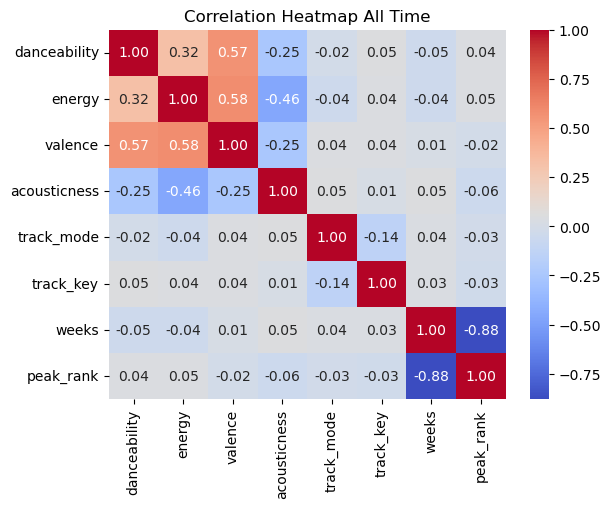

In [26]:
corr = weeks_properties_df[['danceability', 'energy', 'valence','acousticness','track_mode', 'track_key', 'weeks','peak_rank']].corr()
# Crear el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap All Time')
plt.show()

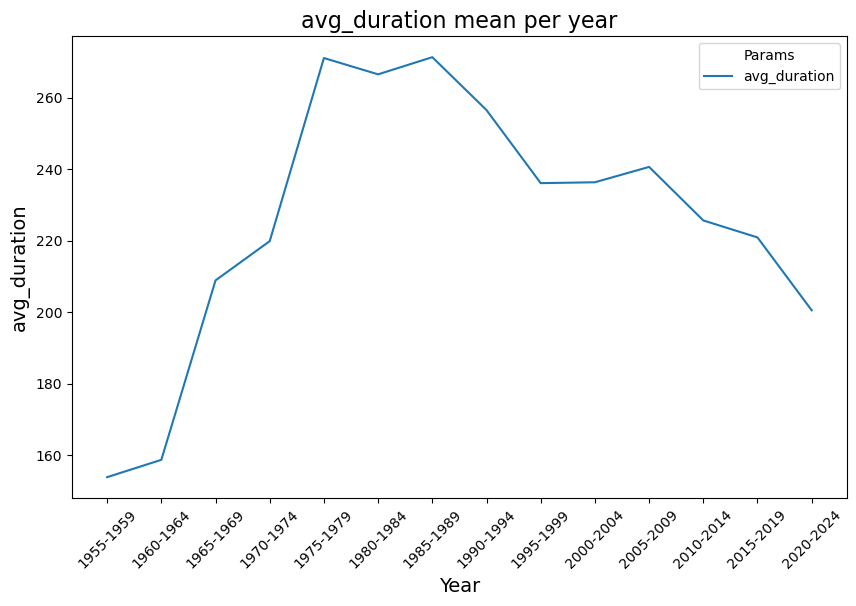

In [31]:
#
#  HA VUELTO!!!!
#
plot_year_mean(duration_lustrum_df, type="line", params=['avg_duration'], year_column='lustrum',grid=False)

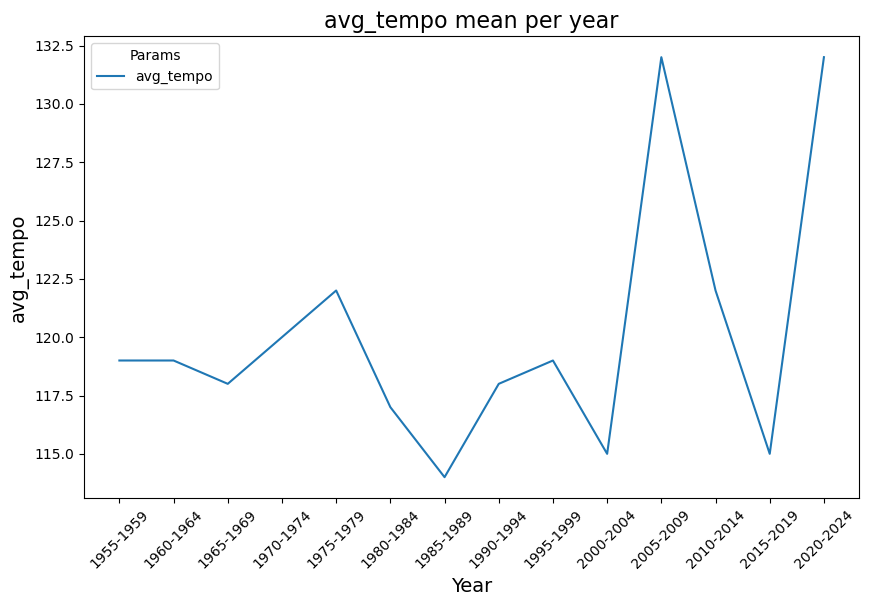

In [35]:
#
# WTF
#
plot_year_mean(tempo_lustrum_df, type="line", params=['avg_tempo'], year_column='lustrum',grid=False)